In [ ]:
# CLUSTERING DIABETES PATIENT DATASETS

<img src="Clustering.png" style="width:1000px; height:300px" />

In [1]:
# This script pulls in datasets from Diabetes patients from the UCI ML repository. Objective here is exploration of usefulness of 
# Unsupervised Clustering Algorithms to group patients on basis of similar characteristics. This should
#help clinicians understand which treatments might work for their patients. k-means clustering algorithms
# were used. Goal is to support a more personalised approach to care provision on basis of specific patient characteristics

In [2]:
#Import Libraries
library(dplyr)
library(ggplot2)
library(tidyr)
library(caret)
library(lubridate)
library(purrr)
library(mgcv)
library(rpart)
install.packages("sigr"); library(sigr)
library(tidyverse)
library(tidyselect)
library(utils)
library(base)
library(broom)
library(cluster)
library(ellipsis)
library(graphics)
library(grDevices)
library(highr)
library(lattice)
library(methods)
library(nlme)
library(readr)
library(readxl)
library(stats)
library(stringr)
install.packages("vtreat"); library(vtreat)
library(tibble)
install.packages("xgboost"); library(xgboost)
library(randomForest)
library(magrittr)
install.packages("Metrics"); library(Metrics)
install.packages("assertive"); library(assertive)
library(lubridate)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'purrr'

The following object is masked from 'package:caret':

    lift

Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyver

In [3]:
install.packages("vtreat"); library(vtreat)
install.packages("chron"); library(chron)
install.packages("data.table"); library(data.table)
install.packages("binr"); library(binr)
install.packages("psych"); library(psych)
install.packages("ggfortify"); library(ggfortify)
install.packages("tibble"); library(tibble)
install.packages("mlbench"); library(mlbench)
install.packages("yardstick"); library(yardstick)
library(rpart) 
library(parsnip)
install.packages("wrapr"); library(wrapr)
library(brotools)
install.packages("rsample"); library(rsample)
install.packages("e1071"); library(e1071)
install.packages("elasticnet"); library(elasticnet)
install.packages("glmnet"); library(glmnet)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'chron'

The following objects are masked from 'package:lubridate':

    days, hours, minutes, seconds, years

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'data.table'

The following object is masked from 'package:wrapr':

    :=

The following object is masked from 'package:purrr':

    transpose

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:dplyr':

    between, first, last

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'psych'

The following object is masked from 'package:randomForest'

ERROR: Error in library(brotools): there is no package called 'brotools'


In [4]:
# DEFINE HELPER FUNCTION

In [14]:
load_file <- function(filename) {
    #loads text into dataframe
    return (read.table(filename, header = FALSE, sep = "", col.names = c("Date", "Time", "Code", "Value")))
} 

print(load_file)

function(filename) {
    #loads text into dataframe
    return (read.table(filename, header = FALSE, sep = "", col.names = c("Date", "Time", "Code", "Value")))
}


In [15]:
# LOADING FILES

In [18]:
D1 <- load_file("data-01")
D1$pid <- c("D1")
head(D1)

Date,Time,Code,Value,pid
04-21-1991,9:09,58,100,D1
04-21-1991,9:09,33,9,D1
04-21-1991,9:09,34,13,D1
04-21-1991,17:08,62,119,D1
04-21-1991,17:08,33,7,D1
04-21-1991,22:51,48,123,D1


In [19]:
D2 <- load_file("data-01")
D2$pid <- c("D2")
head(D2)

Date,Time,Code,Value,pid
04-21-1991,9:09,58,100,D2
04-21-1991,9:09,33,9,D2
04-21-1991,9:09,34,13,D2
04-21-1991,17:08,62,119,D2
04-21-1991,17:08,33,7,D2
04-21-1991,22:51,48,123,D2


In [20]:
D3 <- load_file("data-03")
D3$pid <- c("D3")

In [21]:
D4 <- load_file("data-04")
D4$pid <- c("D4")

In [22]:
D5 <- load_file("data-05")
D5$pid <- c("D5")

In [23]:
D6 <- load_file("data-06")
D6$pid <- c("D6")

In [24]:
D7 <- load_file("data-07")
D7$pid <- c("D7")

In [25]:
D8 <- load_file("data-08")
D8$pid <- c("D8")

In [26]:
D9 <- load_file("data-09")
D9$pid <- c("D9")

In [27]:
D10 <- load_file("data-10")
D10$pid <- c("D10")

In [28]:
D11 <- load_file("data-11")
D11$pid <- c("D11")

In [29]:
D12 <- load_file("data-12")
D12$pid <- c("D12")

In [31]:
D13 <- load_file("data-13")
D13$pid <- c("D13")

In [32]:
D14 <- load_file("data-14")
D14$pid <- c("D14")

In [33]:
D15 <- load_file("data-15")
D15$pid <- c("D15")

In [34]:
D16 <- load_file("data-16")
D16$pid <- c("D16")

In [36]:
D17 <- load_file("data-17")
D17$pid <- c("D17")

In [37]:
D18 <- load_file("data-18")
D18$pid <- c("D18")

In [38]:
D19 <- load_file("data-19")
D19$pid <- c("D19")

In [39]:
D20 <- load_file("data-20")
D20$pid <- c("D20")

In [40]:
D21 <- load_file("data-21")
D21$pid <- c("D21")

In [41]:
D22 <- load_file("data-22")
D22$pid <- c("D22")

In [42]:
D23 <- load_file("data-23")
D23$pid <- c("D23")

In [43]:
D24 <- load_file("data-24")
D24$pid <- c("D24")

In [44]:
D25 <- load_file("data-25")
D25$pid <- c("D25")

In [45]:
D26 <- load_file("data-26")
D26$pid <- c("D26")

In [47]:
D28 <- load_file("data-28")
D28$pid <- c("D28")

In [49]:
D30 <- load_file("data-30")
D30$pid <- c("30")

In [50]:
D31 <- load_file("data-31")
D31$pid <- c("31")

In [51]:
D32 <- load_file("data-32")
D32$pid <- c("32")

In [56]:
#Combine all datasets into one dataframe
Dtotal <- rbind(D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12, D13, D14, D15, D16, D17, D18, D19, D20, D21, D22, D23, D24, D25, D26, D28, D30, D31, D32)
nrow(Dtotal)
head(Dtotal)
str(Dtotal)

[1] 12294

Date,Time,Code,Value,pid
04-21-1991,9:09,58,100,D1
04-21-1991,9:09,33,9,D1
04-21-1991,9:09,34,13,D1
04-21-1991,17:08,62,119,D1
04-21-1991,17:08,33,7,D1
04-21-1991,22:51,48,123,D1


'data.frame':	12294 obs. of  5 variables:
 $ Date : Factor w/ 748 levels "04-21-1991","04-22-1991",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Time : Factor w/ 1052 levels "08:00","10:00",..: 251 251 251 77 77 162 209 209 209 47 ...
 $ Code : int  58 33 34 62 33 48 58 33 34 33 ...
 $ Value: num  100 9 13 119 7 123 216 10 13 2 ...
 $ pid  : chr  "D1" "D1" "D1" "D1" ...


In [62]:
#Conversion of Date column to "ymd" format

Dtotal2 <- Dtotal %>%
    mutate(Date1 = mdy(Date))

head(Dtotal2)
str(Dtotal2)

Warning message:
" 7 failed to parse."

Date,Time,Code,Value,pid,Date1
04-21-1991,9:09,58,100,D1,1991-04-21
04-21-1991,9:09,33,9,D1,1991-04-21
04-21-1991,9:09,34,13,D1,1991-04-21
04-21-1991,17:08,62,119,D1,1991-04-21
04-21-1991,17:08,33,7,D1,1991-04-21
04-21-1991,22:51,48,123,D1,1991-04-21


'data.frame':	12294 obs. of  6 variables:
 $ Date : Factor w/ 748 levels "04-21-1991","04-22-1991",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Time : Factor w/ 1052 levels "08:00","10:00",..: 251 251 251 77 77 162 209 209 209 47 ...
 $ Code : int  58 33 34 62 33 48 58 33 34 33 ...
 $ Value: num  100 9 13 119 7 123 216 10 13 2 ...
 $ pid  : chr  "D1" "D1" "D1" "D1" ...
 $ Date1: Date, format: "1991-04-21" "1991-04-21" ...


In [63]:
#Conversion of Time column to datetime format
Dtotal2$datetime = paste(Dtotal2$Date, Dtotal2$Time)
Dtotal2$datetime = mdy_hm(Dtotal2$datetime)
head(Dtotal2)
str(Dtotal2)

Warning message:
" 7 failed to parse."

Date,Time,Code,Value,pid,Date1,datetime
04-21-1991,9:09,58,100,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,9:09,33,9,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,9:09,34,13,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,17:08,62,119,D1,1991-04-21,1991-04-21 17:08:00
04-21-1991,17:08,33,7,D1,1991-04-21,1991-04-21 17:08:00
04-21-1991,22:51,48,123,D1,1991-04-21,1991-04-21 22:51:00


'data.frame':	12294 obs. of  7 variables:
 $ Date    : Factor w/ 748 levels "04-21-1991","04-22-1991",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Time    : Factor w/ 1052 levels "08:00","10:00",..: 251 251 251 77 77 162 209 209 209 47 ...
 $ Code    : int  58 33 34 62 33 48 58 33 34 33 ...
 $ Value   : num  100 9 13 119 7 123 216 10 13 2 ...
 $ pid     : chr  "D1" "D1" "D1" "D1" ...
 $ Date1   : Date, format: "1991-04-21" "1991-04-21" ...
 $ datetime: POSIXct, format: "1991-04-21 09:09:00" "1991-04-21 09:09:00" ...


In [64]:
#Filtering out Insulin doses and corresponding codes
target5 <- c(33, 34, 35)

Diab_Insulin <- Dtotal2 %>%
    filter(Code %in% target5) %>%
    rename(Insulin_Code = Code, Insulin_dose = Value)

head(Diab_Insulin)
nrow(Diab_Insulin)

Date,Time,Insulin_Code,Insulin_dose,pid,Date1,datetime
04-21-1991,9:09,33,9,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,9:09,34,13,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,17:08,33,7,D1,1991-04-21,1991-04-21 17:08:00
04-22-1991,7:35,33,10,D1,1991-04-22,1991-04-22 07:35:00
04-22-1991,7:35,34,13,D1,1991-04-22,1991-04-22 07:35:00
04-22-1991,13:40,33,2,D1,1991-04-22,1991-04-22 13:40:00


[1] 6234

In [68]:
#Filtering out Glucose doses and corresponding codes

target6 <- c(48, 58, 60, 62, 65)

Diab_Glucose <- Dtotal2 %>%
    filter(Code %in% target6) %>%
    rename(Glucose_Code = Code, Glucose_value = Value)

head(Diab_Glucose)
nrow(Diab_Glucose)

Date,Time,Glucose_Code,Glucose_value,pid,Date1,datetime
04-21-1991,9:09,58,100,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,17:08,62,119,D1,1991-04-21,1991-04-21 17:08:00
04-21-1991,22:51,48,123,D1,1991-04-21,1991-04-21 22:51:00
04-22-1991,7:35,58,216,D1,1991-04-22,1991-04-22 07:35:00
04-22-1991,16:56,62,211,D1,1991-04-22,1991-04-22 16:56:00
04-23-1991,7:25,58,257,D1,1991-04-23,1991-04-23 07:25:00


[1] 4776

In [69]:
#Combine both tables for insulin and glucose
Diab_Ins_Gluc <- Diab_Insulin %>%
    inner_join(Diab_Glucose, by = c("pid", "datetime", "Date1"))

head(Diab_Ins_Gluc)
nrow(Diab_Ins_Gluc)

Date.x,Time.x,Insulin_Code,Insulin_dose,pid,Date1,datetime,Date.y,Time.y,Glucose_Code,Glucose_value
04-21-1991,9:09,33,9,D1,1991-04-21,1991-04-21 09:09:00,04-21-1991,9:09,58,100
04-21-1991,9:09,34,13,D1,1991-04-21,1991-04-21 09:09:00,04-21-1991,9:09,58,100
04-21-1991,17:08,33,7,D1,1991-04-21,1991-04-21 17:08:00,04-21-1991,17:08,62,119
04-22-1991,7:35,33,10,D1,1991-04-22,1991-04-22 07:35:00,04-22-1991,7:35,58,216
04-22-1991,7:35,34,13,D1,1991-04-22,1991-04-22 07:35:00,04-22-1991,7:35,58,216
04-22-1991,16:56,33,7,D1,1991-04-22,1991-04-22 16:56:00,04-22-1991,16:56,62,211


[1] 3683

In [73]:
#Remove id, Date and Time columns

Diab_Ins_Gluc2 <- Diab_Ins_Gluc %>%
    select(-Date.x, -Time.x, -pid, -Date.y, -Time.y)

head(Diab_Ins_Gluc2)
str(Diab_Ins_Gluc2)

Insulin_Code,Insulin_dose,Date1,datetime,Glucose_Code,Glucose_value
33,9,1991-04-21,1991-04-21 09:09:00,58,100
34,13,1991-04-21,1991-04-21 09:09:00,58,100
33,7,1991-04-21,1991-04-21 17:08:00,62,119
33,10,1991-04-22,1991-04-22 07:35:00,58,216
34,13,1991-04-22,1991-04-22 07:35:00,58,216
33,7,1991-04-22,1991-04-22 16:56:00,62,211


'data.frame':	3683 obs. of  6 variables:
 $ Insulin_Code : int  33 34 33 33 34 33 33 34 33 33 ...
 $ Insulin_dose : num  9 13 7 10 13 7 11 13 7 10 ...
 $ Date1        : Date, format: "1991-04-21" "1991-04-21" ...
 $ datetime     : POSIXct, format: "1991-04-21 09:09:00" "1991-04-21 09:09:00" ...
 $ Glucose_Code : int  58 58 62 58 58 62 58 58 62 58 ...
 $ Glucose_value: num  100 100 119 216 216 211 257 257 129 239 ...


In [83]:
#Remove the date and time columns
Diab_Ins_Gluc3 <- Diab_Ins_Gluc2 %>%
    select(-Date1, -datetime)

head(Diab_Ins_Gluc3)

Insulin_Code,Insulin_dose,Glucose_Code,Glucose_value
33,9,58,100
34,13,58,100
33,7,62,119
33,10,58,216
34,13,58,216
33,7,62,211


In [84]:
#Scale the data to eliminate redundancy and ensure good quality clusters are generated
scaled <- scale(Diab_Ins_Gluc3)
head(scaled)

Insulin_Code,Insulin_dose,Glucose_Code,Glucose_value
-0.6592653,-0.15158352,-0.6003372,-0.7962417
1.5164283,0.39696190,-0.6003372,-0.7962417
-0.6592653,-0.42585623,1.0772364,-0.5348619
-0.6592653,-0.01444716,-0.6003372,0.7995511
1.5164283,0.39696190,-0.6003372,0.7995511
-0.6592653,-0.42585623,1.0772364,0.7307670


In [76]:
#GROUPING PATIENTS

In [87]:
#Set the seed so that results are reproducible
seed_val <- 10
set.seed(seed_val)

#Select a number of clusters
k <- 5

#Run the k-means algorithm
first_clust = kmeans(scaled, centers = k, nstart = 1)

#How many patients are in each cluster?
print(first_clust$size)

[1] 1013  320  338 1586  426


In [88]:
#Run another round of k-means

#Set the seed
seed_val <- 38
set.seed(seed_val)

#Select a number of clusters and run the k-means algorithm
k <- 5
second_clust = kmeans(scaled, centers = k, nstart = 1)

#How many patients are in each cluster?
print(second_clust$size)

[1]  439  625  560  893 1166


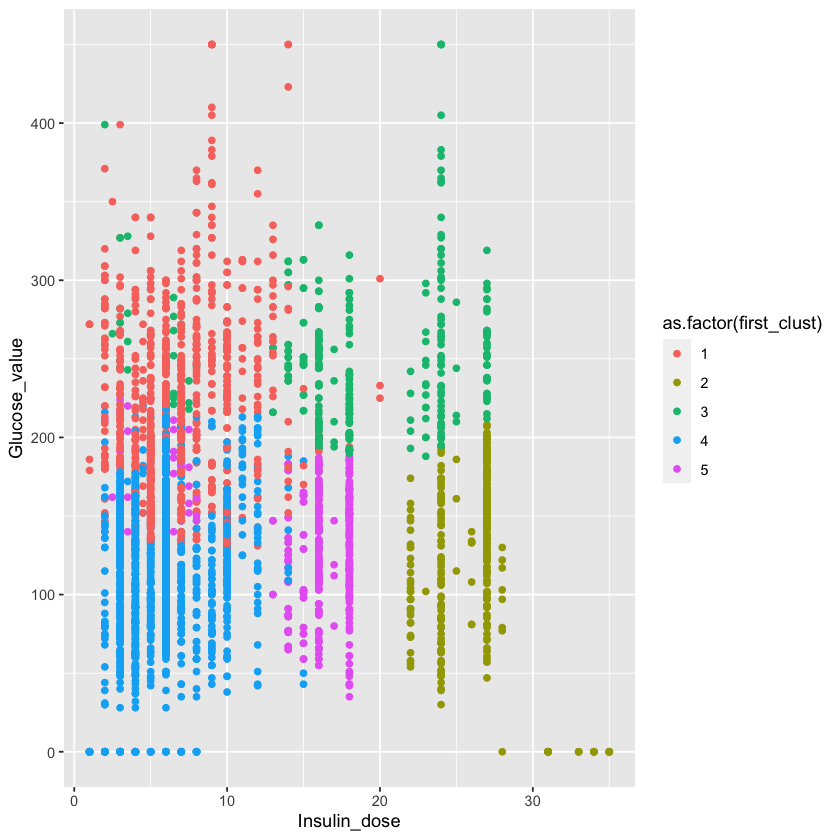

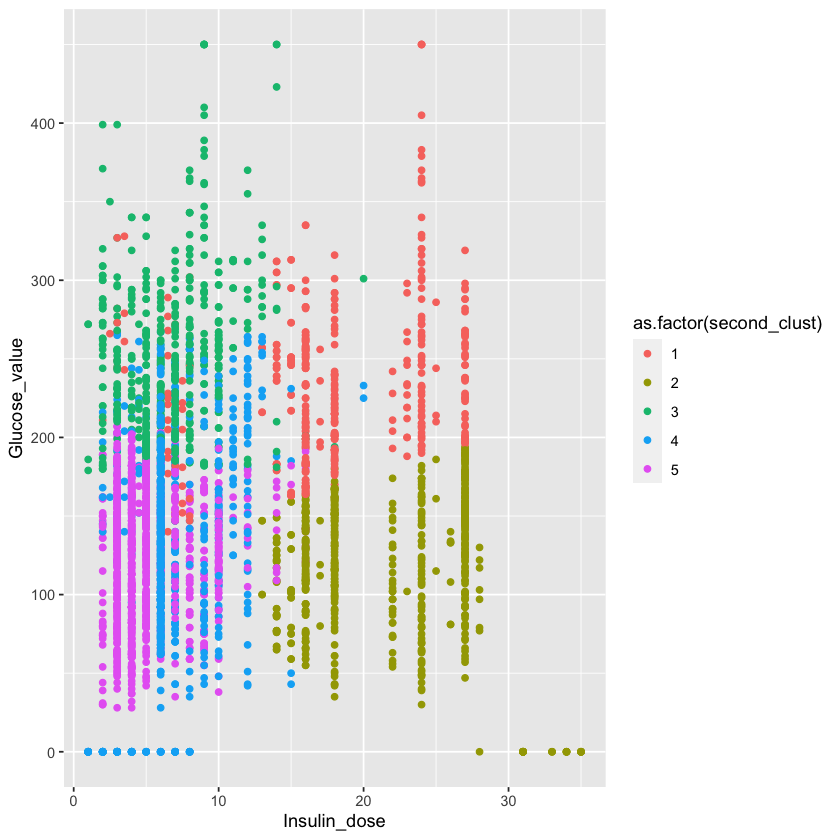

In [86]:
#Comparing patient clusters to evaluate stability of the k-means algo on the patient data

#Add cluser assignments to the data
Diab_Ins_Gluc2["first_clust"] <- first_clust$cluster
Diab_Ins_Gluc2["second_clust"] <- second_clust$cluster

#Create and print the plot of Insulin and Glucose for the first clustering algorithm
plot_one <- ggplot(Diab_Ins_Gluc2, aes(x = Insulin_dose, y = Glucose_value, colour = as.factor(first_clust))) + geom_point()
plot_one

#Create and print the plot of Insulin and Glucose for the second clustering algorithm
plot_two <- ggplot(Diab_Ins_Gluc2, aes(x = Insulin_dose, y= Glucose_value, colour = as.factor(second_clust))) + geom_point()
plot_two

#The two clusters do not appear to be the same size and also do not have similar distribution of variables.
#This implies the k-means algorithm is not stable when running multiple iterations (as we do not see similar groups of patients
#showing up in the plots from the different iterations of the algorithm)

In [93]:
# CREATE ELBOW PLOT 

#Use map_dbl to run many models with varying value of (centres)
tot_withinss <- map_dbl(1:10, function(k) {
    kmodel <- kmeans(x = Diab_Ins_Gluc3, centers = k)
    kmodel$tot.withinss
})

#Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
    k = 1:10,
    tot_withinss = tot_withinss
)

print(elbow_df)

    k tot_withinss
1   1   19673189.6
2   2    7456506.0
3   3    3949203.3
4   4    2718076.7
5   5    1996546.9
6   6    1411564.4
7   7    1108921.5
8   8     907575.4
9   9     718863.4
10 10     603183.2


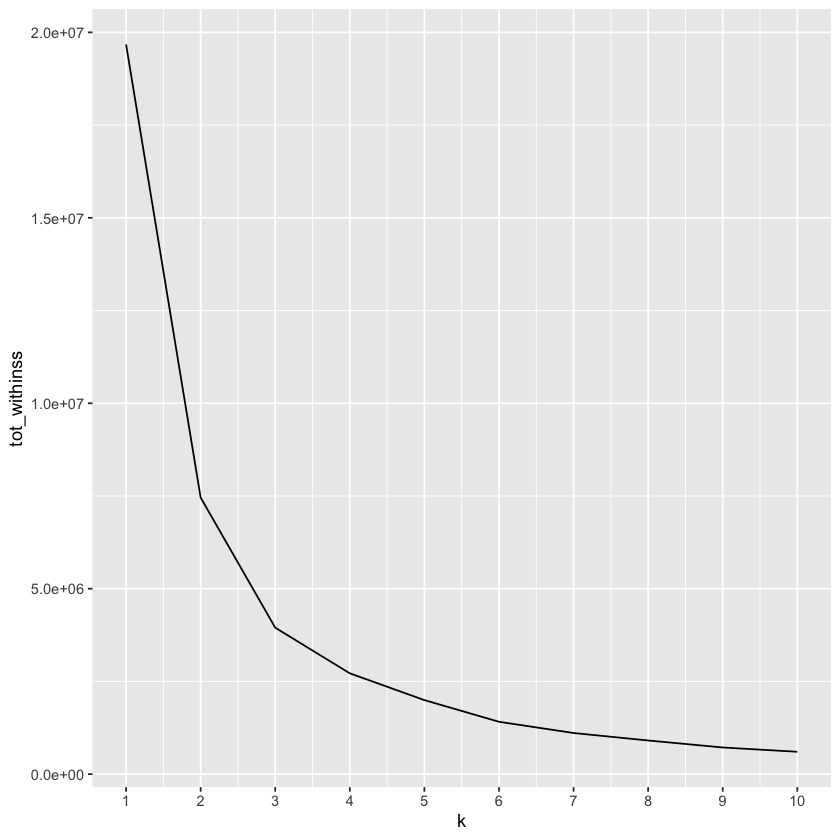

In [95]:
#Plot elbow (scree) plot

ggplot(elbow_df, aes(x = k, y = tot_withinss)) + geom_line() + scale_x_continuous(breaks = 1:10)
#Graph below implies a k value of 2 or 3 should be chosen as a sharp decline occurs from k of 2 to k of 3, 
#followed by a more gradual decrease in slope